In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\yash.jha\Downloads\create-share-analytics-jupyter-notebooks\datasets\laptops.csv",encoding='ISO-8859-1',index_col=0)

In [4]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.shape

(1303, 12)

In [6]:
df.drop(['Product',
         'ScreenResolution',
         'Cpu',
         'Memory',
         'Gpu',
         'Weight'], inplace=True, axis=1)

In [7]:
df

,Company,TypeName,Inches,Ram,OpSys,Price_euros
1,Apple,Ultrabook,13.3,8GB,macOS,1339.69
2,Apple,Ultrabook,13.3,8GB,macOS,898.94
3,HP,Notebook,15.6,8GB,No OS,575.00
4,Apple,Ultrabook,15.4,16GB,macOS,2537.45
5,Apple,Ultrabook,13.3,8GB,macOS,1803.60
...,...,...,...,...,...,...
1316,Lenovo,2 in 1 Convertible,14.0,4GB,Windows 10,638.00
1317,Lenovo,2 in 1 Convertible,13.3,16GB,Windows 10,1499.00
1318,Lenovo,Notebook,14.0,2GB,Windows 10,229.00
1319,HP,Notebook,15.6,6GB,Windows 10,764.00


In [8]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [12]:
df.TypeName.value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

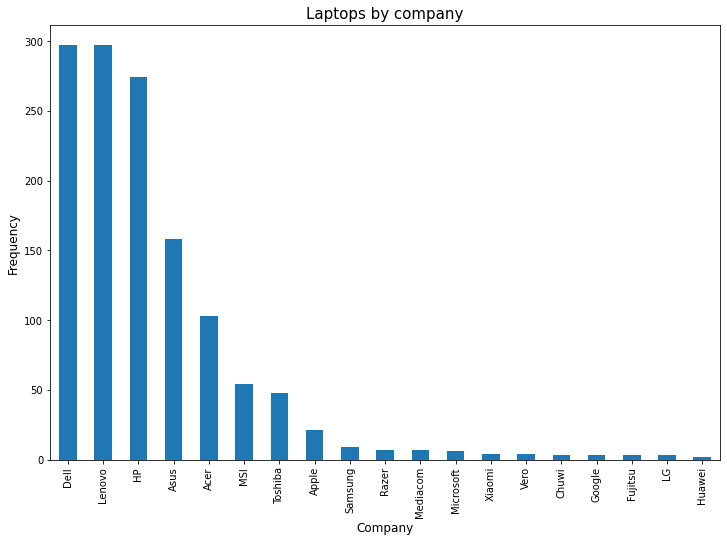

In [23]:
plt.figure(figsize=(12,8))
df['Company'].value_counts().plot(kind='bar')
plt.title('Laptops by company', fontsize=15)
plt.xlabel('Company',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

<AxesSubplot:>

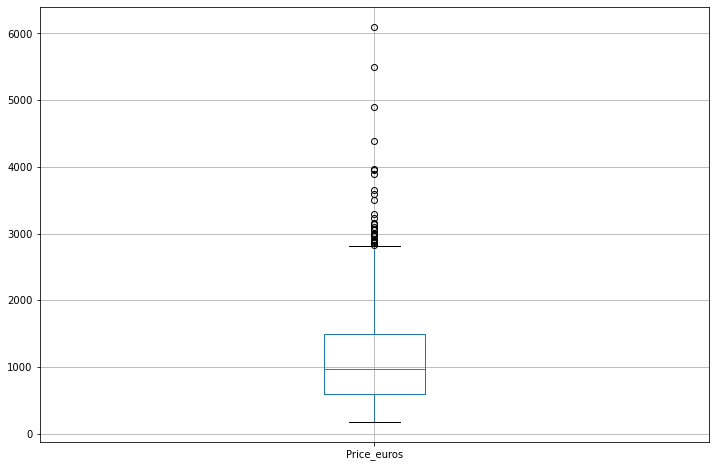

In [29]:
plt.figure(figsize=(12,8))
df[['Price_euros']].boxplot()


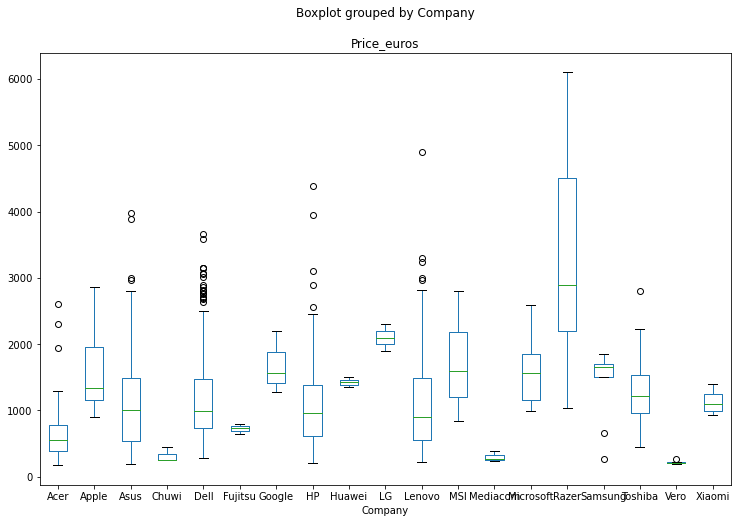

In [34]:
df.boxplot(by='Company',column='Price_euros',grid=False,figsize=(12,8))
plt.show()

C:\Users\yash.jha\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


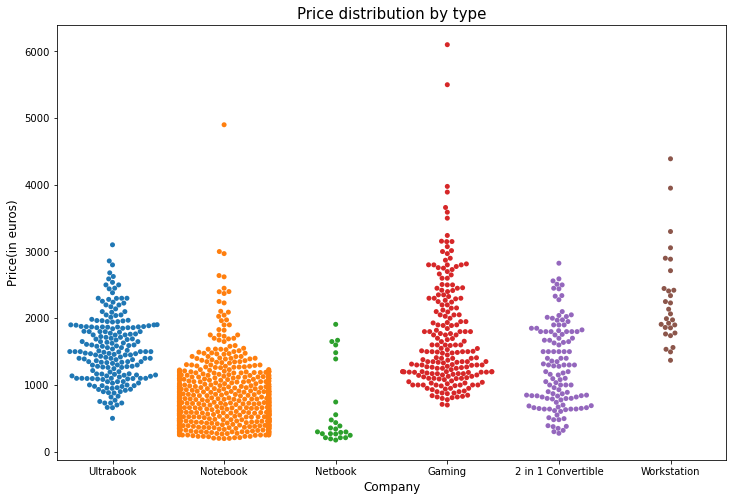

In [36]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='TypeName', y='Price_euros',data=df)
plt.title('Price distribution by type', fontsize=15)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price(in euros)', fontsize=12)
plt.show()

In [39]:
# lets build a very simple model for price prediction( Regression model)
#first convert the categorical value to numeric form
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['TypeName']=label_encoder.fit_transform(df['TypeName'])

In [40]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Price_euros
1,Apple,4,13.3,8GB,macOS,1339.69
2,Apple,4,13.3,8GB,macOS,898.94
3,HP,3,15.6,8GB,No OS,575.00
4,Apple,4,15.4,16GB,macOS,2537.45
5,Apple,4,13.3,8GB,macOS,1803.60


In [41]:
#Other way to convert categorical data to numerical data is one hot encoding
df1=pd.get_dummies(df)
df1.head()

,TypeName,Inches,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Ram_8GB,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
1,4,13.3,1339.69,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,4,13.3,898.94,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3,15.6,575.00,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,4,15.4,2537.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,4,13.3,1803.60,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [43]:
df1.shape

(1303, 40)

In [44]:
# Now begin with Regression model
x=df1.drop('Price_euros',axis=1)
y=df1['Price_euros']

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [47]:
x_train.shape,x_test.shape

((1042, 39), (261, 39))

In [48]:
y_train.shape,y_test.shape

((1042,), (261,))

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression()

In [53]:
linear_regression.score(x_train,y_train)

0.6858013214728799

In [54]:
y_pred=linear_regression.predict(x_test)
r2_score(y_test,y_pred)

0.6238236988724106

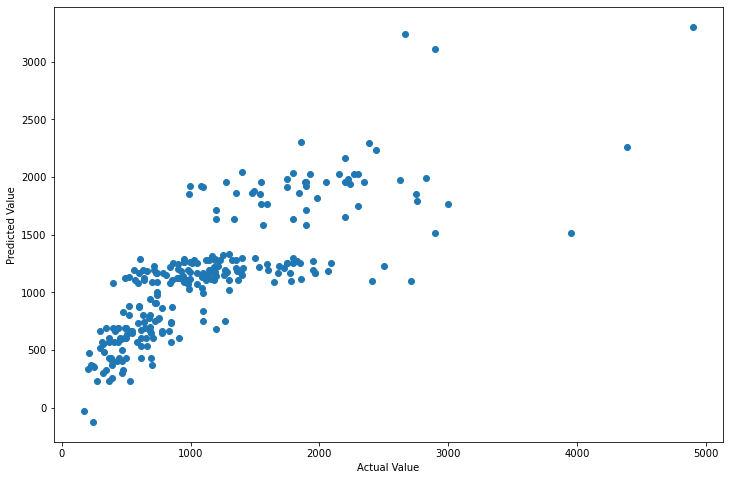

In [57]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()